Award Amounts - Small Businesses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Award Amounts Small Businesses.csv')
df

,total_obligated_amount,period_of_performance_start_date,contracting_officers_determination_of_business_size
0,567677.12,10/1/2001,SMALL BUSINESS
1,110418.75,2/6/2003,SMALL BUSINESS
2,29667.00,1/1/2004,SMALL BUSINESS
3,108960.00,6/1/2004,SMALL BUSINESS
4,54180.00,10/1/2004,SMALL BUSINESS
...,...,...,...
9451,72826.00,9/18/2021,SMALL BUSINESS
9452,53700.00,9/18/2021,SMALL BUSINESS
9453,14049.60,9/20/2021,SMALL BUSINESS
9454,16758.00,9/24/2021,SMALL BUSINESS


In [3]:
df["period_of_performance_start_date"] = pd.to_datetime(df["period_of_performance_start_date"], format='%m/%d/%Y')
df["period_of_performance_start_date"] = df["period_of_performance_start_date"].dt.year
df

,total_obligated_amount,period_of_performance_start_date,contracting_officers_determination_of_business_size
0,567677.12,2001,SMALL BUSINESS
1,110418.75,2003,SMALL BUSINESS
2,29667.00,2004,SMALL BUSINESS
3,108960.00,2004,SMALL BUSINESS
4,54180.00,2004,SMALL BUSINESS
...,...,...,...
9451,72826.00,2021,SMALL BUSINESS
9452,53700.00,2021,SMALL BUSINESS
9453,14049.60,2021,SMALL BUSINESS
9454,16758.00,2021,SMALL BUSINESS


In [4]:
years = df["period_of_performance_start_date"].unique()
years

array([2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [5]:
list1 = list(years)
list2 = list(df.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
condensed_df = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
condensed_df

,Year,Average Award Amount
0,2001,567677.120000
1,2003,110418.750000
2,2004,64269.000000
3,2005,66122.292000
4,2006,119261.900000
5,2007,116334.351224
6,2008,94321.410826
7,2009,82135.169369
8,2010,82129.267152
9,2011,79552.153082


Text(0.5, 1.0, 'Average Award Amount for Small Businesses Over Time (2001-2021)')

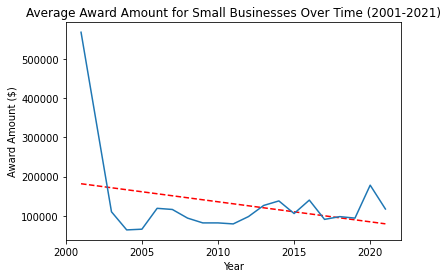

In [6]:
z = np.polyfit(condensed_df["Year"], condensed_df["Average Award Amount"], 1)
p = np.poly1d(z)

plt.plot(condensed_df["Year"], p(condensed_df["Year"]), "r--")
plt.plot(condensed_df["Year"], condensed_df["Average Award Amount"])
plt.xticks(np.arange(2000, 2025, 5))
plt.xlabel("Year")
plt.ylabel("Award Amount ($)")
plt.title("Average Award Amount for Small Businesses Over Time (2001-2021)")

In [7]:
condensed_df_2008_and_beyond = condensed_df[condensed_df["Year"] >= 2008].reset_index(drop=True)
condensed_df_2008_and_beyond

,Year,Average Award Amount
0,2008,94321.410826
1,2009,82135.169369
2,2010,82129.267152
3,2011,79552.153082
4,2012,98194.827145
5,2013,126568.756436
6,2014,138102.976133
7,2015,106012.701307
8,2016,140203.244548
9,2017,91078.670488


Text(0.5, 1.0, 'Average Award Amount for Small Businesses Over Time (2008-2021)')

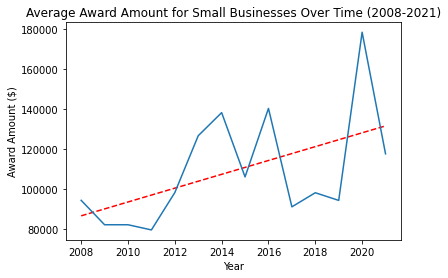

In [8]:
z = np.polyfit(condensed_df_2008_and_beyond["Year"], condensed_df_2008_and_beyond["Average Award Amount"], 1)
p = np.poly1d(z)

plt.plot(condensed_df_2008_and_beyond["Year"], p(condensed_df_2008_and_beyond["Year"]), "r--")
plt.plot(condensed_df_2008_and_beyond["Year"], condensed_df_2008_and_beyond["Average Award Amount"])
plt.xlabel("Year")
plt.ylabel("Award Amount ($)")
plt.title("Average Award Amount for Small Businesses Over Time (2008-2021)")

Recipient Types with Award Amounts

In [9]:
df2 = pd.read_csv('Recipient Types.csv')
df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,10/1/2001,t,t,t
1,2/6/2003,t,f,f
2,1/1/2004,f,t,f
3,6/1/2004,f,t,f
4,10/1/2004,f,t,t
...,...,...,...,...
9451,9/18/2021,t,f,f
9452,9/18/2021,t,f,t
9453,9/20/2021,f,t,f
9454,9/24/2021,t,f,t


In [10]:
df2["period_of_performance_start_date"] = pd.to_datetime(df2["period_of_performance_start_date"], format='%m/%d/%Y')
df2["period_of_performance_start_date"] = df2["period_of_performance_start_date"].dt.year
df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,2001,t,t,t
1,2003,t,f,f
2,2004,f,t,f
3,2004,f,t,f
4,2004,f,t,t
...,...,...,...,...
9451,2021,t,f,f
9452,2021,t,f,t
9453,2021,f,t,f
9454,2021,t,f,t


In [11]:
condensed_df2 = df2[df2["period_of_performance_start_date"] >= 2008].reset_index(drop=True)
condensed_df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,f,t,f
1,2008,t,f,f
2,2008,f,t,f
3,2008,t,f,f
4,2008,t,f,f
...,...,...,...,...
9336,2021,t,f,f
9337,2021,t,f,t
9338,2021,f,t,f
9339,2021,t,f,t


In [12]:
condensed_df2["veteran_owned_business"] = condensed_df2["veteran_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2["woman_owned_business"] = condensed_df2["woman_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2["minority_owned_business"] = condensed_df2["minority_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,0,1,0
1,2008,1,0,0
2,2008,0,1,0
3,2008,1,0,0
4,2008,1,0,0
...,...,...,...,...
9336,2021,1,0,0
9337,2021,1,0,1
9338,2021,0,1,0
9339,2021,1,0,1


In [13]:
business_counts = condensed_df2.groupby("period_of_performance_start_date")[["veteran_owned_business", "woman_owned_business", "minority_owned_business"]].sum().reset_index()
business_counts.rename(columns = {'period_of_performance_start_date':'Year'}, inplace=True)
business_counts

,Year,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,94,139,74
1,2009,168,233,97
2,2010,338,458,204
3,2011,359,380,171
4,2012,459,295,112
5,2013,626,597,271
6,2014,789,653,301
7,2015,721,746,285
8,2016,595,611,206
9,2017,377,360,153


In [14]:
df3 = pd.read_csv('Recipient Types with Award Amounts.csv')
df3

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,10/1/2001,t,t,t,567677.12
1,2/6/2003,t,f,f,110418.75
2,1/1/2004,f,t,f,29667.00
3,6/1/2004,f,t,f,108960.00
4,10/1/2004,f,t,t,54180.00
...,...,...,...,...,...
9451,9/18/2021,t,f,f,72826.00
9452,9/18/2021,t,f,t,53700.00
9453,9/20/2021,f,t,f,14049.60
9454,9/24/2021,t,f,t,16758.00


In [15]:
df3["period_of_performance_start_date"] = pd.to_datetime(df3["period_of_performance_start_date"], format='%m/%d/%Y')
df3["period_of_performance_start_date"] = df3["period_of_performance_start_date"].dt.year
df3

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,2001,t,t,t,567677.12
1,2003,t,f,f,110418.75
2,2004,f,t,f,29667.00
3,2004,f,t,f,108960.00
4,2004,f,t,t,54180.00
...,...,...,...,...,...
9451,2021,t,f,f,72826.00
9452,2021,t,f,t,53700.00
9453,2021,f,t,f,14049.60
9454,2021,t,f,t,16758.00


In [16]:
condensed_df3 = df3[df3["period_of_performance_start_date"] >= 2008].reset_index(drop=True)
condensed_df3

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,2008,f,t,f,5488.37
1,2008,t,f,f,4287.35
2,2008,f,t,f,420.00
3,2008,t,f,f,21212.60
4,2008,t,f,f,40685.00
...,...,...,...,...,...
9336,2021,t,f,f,72826.00
9337,2021,t,f,t,53700.00
9338,2021,f,t,f,14049.60
9339,2021,t,f,t,16758.00


In [17]:
condensed_df3_veterans = condensed_df3[["period_of_performance_start_date", "veteran_owned_business", "total_obligated_amount"]]
condensed_df3_women = condensed_df3[["period_of_performance_start_date", "woman_owned_business", "total_obligated_amount"]]
condensed_df3_minorities = condensed_df3[["period_of_performance_start_date", "minority_owned_business", "total_obligated_amount"]]

condensed_df3_veterans = condensed_df3_veterans[condensed_df3_veterans["veteran_owned_business"].astype(str) == "t"].reset_index(drop=True)
condensed_df3_women = condensed_df3_women[condensed_df3_women["woman_owned_business"].astype(str) == "t"].reset_index(drop=True)
condensed_df3_minorities = condensed_df3_minorities[condensed_df3_minorities["minority_owned_business"].astype(str) == "t"].reset_index(drop=True)

In [18]:
list1 = list(condensed_df3_veterans["period_of_performance_start_date"].unique())
list2 = list(condensed_df3_veterans.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
veterans_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
veterans_award_amounts

,Year,Average Award Amount
0,2008,143377.080213
1,2009,99741.174405
2,2010,120438.055976
3,2011,103066.729499
4,2012,91903.599673
5,2013,166064.596326
6,2014,180382.285602
7,2015,143102.495964
8,2016,211328.641630
9,2017,104089.652812


In [19]:
list1 = list(condensed_df3_women["period_of_performance_start_date"].unique())
list2 = list(condensed_df3_women.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
women_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
women_award_amounts

,Year,Average Award Amount
0,2008,62429.877914
1,2009,70377.005193
2,2010,60933.391856
3,2011,56756.773816
4,2012,92983.612373
5,2013,86149.572496
6,2014,79493.333890
7,2015,69062.819584
8,2016,72856.587447
9,2017,76945.018806


In [20]:
list1 = list(condensed_df3_minorities["period_of_performance_start_date"].unique())
list2 = list(condensed_df3_minorities.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
minorities_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
minorities_award_amounts

,Year,Average Award Amount
0,2008,104823.575270
1,2009,81893.273299
2,2010,103752.044412
3,2011,77368.974035
4,2012,154914.051429
5,2013,293221.705830
6,2014,262836.897575
7,2015,179846.770947
8,2016,143894.416650
9,2017,58964.061699


Text(0.5, 1.0, 'Recipient Types Drilled Down (2008-2021)')

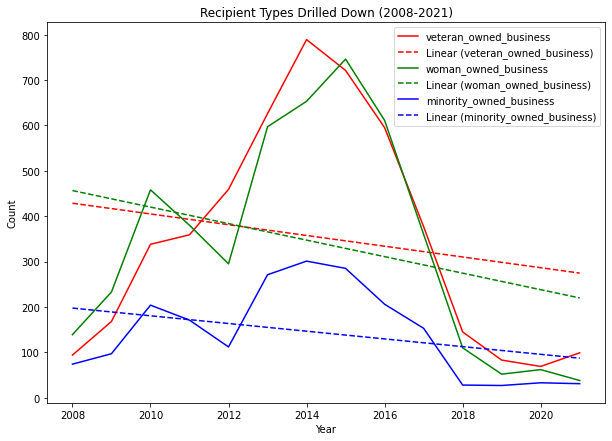

In [21]:
z = np.polyfit(business_counts["Year"], business_counts["veteran_owned_business"], 1)
p = np.poly1d(z)

z2 = np.polyfit(business_counts["Year"], business_counts["woman_owned_business"], 1)
p2 = np.poly1d(z2)

z3 = np.polyfit(business_counts["Year"], business_counts["minority_owned_business"], 1)
p3 = np.poly1d(z3)

plt.figure(figsize=(10,7))
plt.plot(business_counts["Year"], business_counts["veteran_owned_business"], color="r", label="veteran_owned_business")
plt.plot(business_counts["Year"], p(business_counts["Year"]), "r--", label="Linear (veteran_owned_business)")
plt.plot(business_counts["Year"], business_counts["woman_owned_business"], color="g", label="woman_owned_business")
plt.plot(business_counts["Year"], p2(business_counts["Year"]), "g--", label="Linear (woman_owned_business)")
plt.plot(business_counts["Year"], business_counts["minority_owned_business"], color="b", label="minority_owned_business")
plt.plot(business_counts["Year"], p3(business_counts["Year"]), "b--", label="Linear (minority_owned_business)")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Recipient Types Drilled Down (2008-2021)")

Text(0.5, 1.0, 'Veteran-Owned Businesses (2008-2021)')

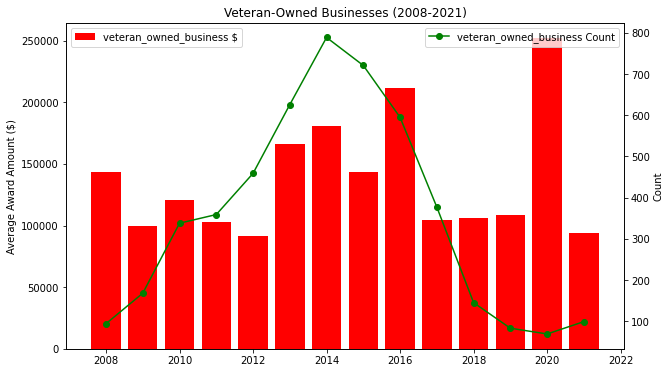

In [22]:
plt.figure(figsize=(10,6))
veteran_award_amounts = plt.bar(veterans_award_amounts["Year"], veterans_award_amounts["Average Award Amount"], color="r", label="veteran_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
veteran_counts = plt.plot(business_counts["Year"], business_counts["veteran_owned_business"], "o-", color="g", label="veteran_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Veteran-Owned Businesses (2008-2021)")

Text(0.5, 1.0, 'Women-Owned Businesses (2008-2021)')

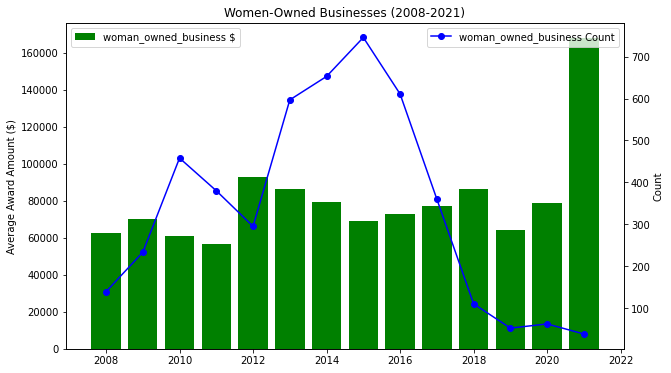

In [23]:
plt.figure(figsize=(10,6))
women_award_amounts = plt.bar(women_award_amounts["Year"], women_award_amounts["Average Award Amount"], color="g", label="woman_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
women_counts = plt.plot(business_counts["Year"], business_counts["woman_owned_business"], "o-", color="b", label="woman_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Women-Owned Businesses (2008-2021)")

Text(0.5, 1.0, 'Minority-Owned Businesses (2008-2021)')

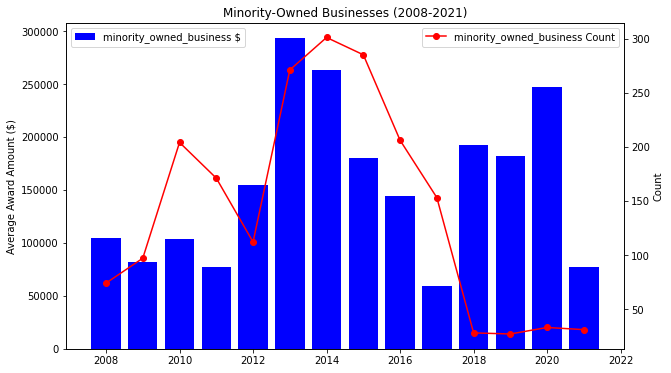

In [24]:
plt.figure(figsize=(10,6))
minority_award_amounts = plt.bar(minorities_award_amounts["Year"], minorities_award_amounts["Average Award Amount"], color="b", label="minority_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
minority_counts = plt.plot(business_counts["Year"], business_counts["minority_owned_business"], "o-", color="r", label="minority_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Minority-Owned Businesses (2008-2021)")

Types of Set Aside

In [25]:
df4 = pd.read_csv('Types of Set Aside.csv')
df4

,type_of_set_aside,economically_disadvantaged_women_owned_small_business
0,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
1,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
2,SMALL BUSINESS SET ASIDE - TOTAL,f
3,SMALL BUSINESS SET ASIDE - TOTAL,f
4,SMALL BUSINESS SET ASIDE - TOTAL,f
...,...,...
35944,SMALL BUSINESS SET ASIDE - PARTIAL,f
35945,SMALL BUSINESS SET ASIDE - TOTAL,f
35946,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35947,SMALL BUSINESS SET ASIDE - TOTAL,f


In [26]:
print(df4.isna().sum())
df4.dropna()

type_of_set_aside                                        1
economically_disadvantaged_women_owned_small_business    0
dtype: int64


,type_of_set_aside,economically_disadvantaged_women_owned_small_business
0,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
1,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
2,SMALL BUSINESS SET ASIDE - TOTAL,f
3,SMALL BUSINESS SET ASIDE - TOTAL,f
4,SMALL BUSINESS SET ASIDE - TOTAL,f
...,...,...
35944,SMALL BUSINESS SET ASIDE - PARTIAL,f
35945,SMALL BUSINESS SET ASIDE - TOTAL,f
35946,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35947,SMALL BUSINESS SET ASIDE - TOTAL,f


In [27]:
df4["economically_disadvantaged_women_owned_small_business"] = df4["economically_disadvantaged_women_owned_small_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1]).astype(int)
sum_EDWOSB = df4["economically_disadvantaged_women_owned_small_business"].sum()
sum_EDWOSB

700

In [28]:
set_aside_counts = df4["type_of_set_aside"].value_counts()
set_aside_counts

SERVICE DISABLED VETERAN OWNED SMALL BUSINESS SET-ASIDE    18248
SMALL BUSINESS SET ASIDE - TOTAL                           12104
SDVOSB SOLE SOURCE                                          2803
VETERAN SET ASIDE                                           1403
SMALL BUSINESS SET ASIDE - PARTIAL                          1107
VETERAN SOLE SOURCE                                          198
WOMEN OWNED SMALL BUSINESS                                    55
EMERGING SMALL BUSINESS SET ASIDE                             30
Name: type_of_set_aside, dtype: int64

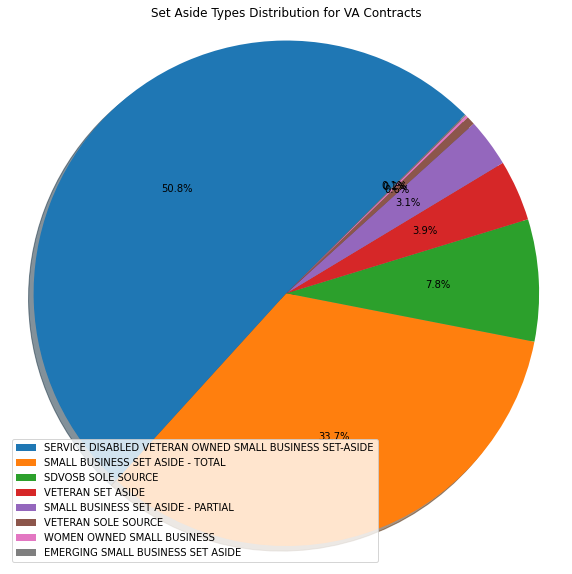

In [29]:
labels = list(set_aside_counts.index)
counts = list(set_aside_counts.values)

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(counts, autopct='%1.1f%%', shadow=True, startangle=45)
ax.legend(labels, loc="best")
ax.axis('equal')
ax.set_title("Set Aside Types Distribution for VA Contracts")
plt.show()